## EMBEDDED SYSTEMS COURSE PROJECT

### Gesture Recognition Using Arduino Nano BLE 33 Sensor

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,CategoricalNB
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# import tensorflow as tf
GESTURES = [
    "punch",
    "slash",
    "stab",
    "upper",
    "flex"
]

df = pd.read_csv('./punch.csv')
df['label'] = np.array([0 for _ in range(df.shape[0])])
df1 = pd.read_csv('./slash.csv')
df1['label'] = np.array([1 for _ in range(df1.shape[0])])
df2 = pd.read_csv('./stab.csv')
df2['label'] = np.array([2 for _ in range(df2.shape[0])])
df3 = pd.read_csv('./upper.csv')
df3['label'] = np.array([3 for _ in range(df3.shape[0])])
df4 = pd.read_csv('./flex.csv')
df4['label'] = np.array([4 for _ in range(df4.shape[0])])

final_df = pd.concat([df,df1,df2,df3,df4])
final_df = final_df.dropna()
final_df

,aX,aY,aZ,gX,gY,gZ,label
0,1.657,-1.140,-0.278,19.592,0.793,13.123,0
1,1.733,-1.268,-0.489,27.283,10.315,14.648,0
2,1.783,-1.323,-0.667,31.433,22.888,17.212,0
3,1.815,-1.427,-0.841,32.104,27.771,19.409,0
4,1.698,-1.530,-1.039,31.433,26.611,16.968,0
...,...,...,...,...,...,...,...
1194,-0.159,-0.180,0.976,0.305,-3.967,0.427,4
1195,-0.165,-0.181,0.976,-0.122,-5.066,0.122,4
1196,-0.161,-0.174,0.969,-0.671,-4.700,0.549,4
1197,-0.151,-0.181,0.963,-1.160,-4.089,0.610,4


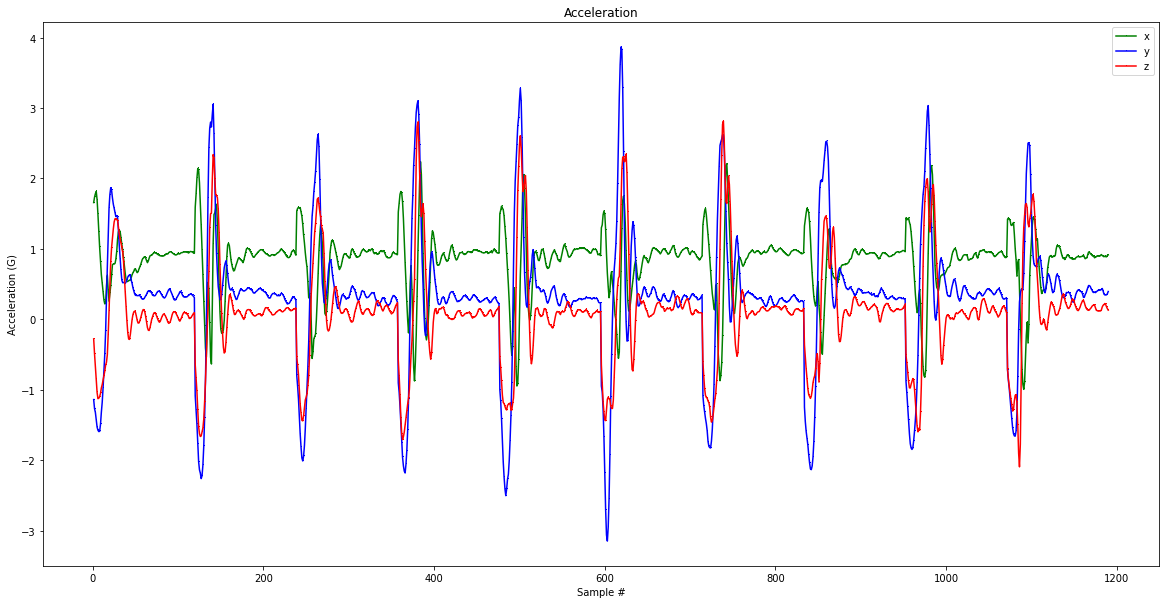

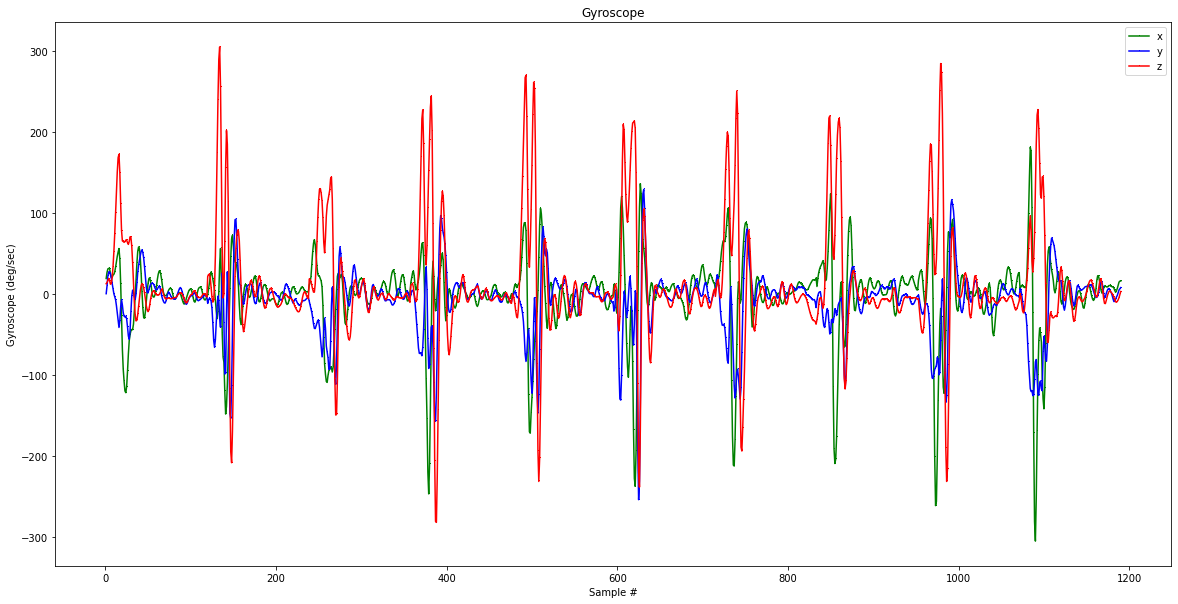

In [6]:
index = range(1, len(df['aX']) + 1)
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()

In [9]:
Y = final_df['label']
X = final_df[['aX','aY','aZ','gX','gY','gZ']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle=True, random_state = 42)

#### Training XGBoost Classifier

In [16]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
pred = xgb_model.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.9809523809523809
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       387
           1       0.96      0.98      0.97       353
           2       0.99      0.99      0.99       357
           3       0.99      0.99      0.99       352
           4       0.98      0.98      0.98       336

    accuracy                           0.98      1785
   macro avg       0.98      0.98      0.98      1785
weighted avg       0.98      0.98      0.98      1785



#### Training LGBM Classifier

In [17]:
lgb_model = LGBMClassifier()
lgb_model.fit(X_train, y_train)
pred = lgb_model.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.9809523809523809
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       387
           1       0.96      0.99      0.98       353
           2       1.00      0.99      0.99       357
           3       0.99      0.99      0.99       352
           4       0.98      0.97      0.98       336

    accuracy                           0.98      1785
   macro avg       0.98      0.98      0.98      1785
weighted avg       0.98      0.98      0.98      1785



#### Training Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier 
rgc_model = RandomForestClassifier()
rgc_model.fit(X_train, y_train)
pred = rgc_model.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.984873949579832
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       387
           1       0.96      0.99      0.97       353
           2       0.99      1.00      1.00       357
           3       1.00      1.00      1.00       352
           4       0.99      0.99      0.99       336

    accuracy                           0.98      1785
   macro avg       0.99      0.99      0.99      1785
weighted avg       0.99      0.98      0.98      1785



#### Training Gaussian Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))


0.7058823529411765
              precision    recall  f1-score   support

           0       0.52      0.57      0.55       387
           1       0.58      0.40      0.47       353
           2       0.68      0.87      0.76       357
           3       0.86      0.89      0.87       352
           4       0.92      0.82      0.87       336

    accuracy                           0.71      1785
   macro avg       0.71      0.71      0.70      1785
weighted avg       0.71      0.71      0.70      1785



#### Training Logistic Regression

In [20]:
from sklearn.linear_model import  LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.7507002801120448
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       387
           1       0.74      0.47      0.58       353
           2       0.80      0.85      0.83       357
           3       0.71      0.90      0.80       352
           4       0.82      0.72      0.77       336

    accuracy                           0.75      1785
   macro avg       0.76      0.75      0.74      1785
weighted avg       0.75      0.75      0.74      1785



#### Training Gradient Boosting Classifier

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
pred = gbc.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.973109243697479
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       387
           1       0.94      0.98      0.96       353
           2       0.98      0.99      0.99       357
           3       0.97      0.99      0.98       352
           4       0.98      0.96      0.97       336

    accuracy                           0.97      1785
   macro avg       0.97      0.97      0.97      1785
weighted avg       0.97      0.97      0.97      1785



#### Saving The Best Model

In [22]:
import pickle

model_bytes = pickle.dumps(rgc_model)
with open('model.h', 'w') as f:
    f.write('#ifndef MODEL_H\n')
    f.write('#define MODEL_H\n')
    f.write('#include <stdint.h>\n')
    f.write('const uint8_t model_data[] = {')
    for byte in model_bytes:
        f.write(str(hex(byte)) + ', ')
    f.write('};\n')
    f.write('#endif\n')